In [1]:
!nvidia-smi

Thu Oct 24 21:53:43 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1080      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   47C    P8             17W /  200W |     652MiB /   8192MiB |     11%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


In [3]:
!pip install tensorflow imgaug

In [4]:
!pip install scikit-learn


In [5]:
import os 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from tensorflow import keras 
import tensorflow as tf 
import cv2 
import pandas as pd 
import random 
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa


In [6]:
datadir = 'track'

In [7]:
# assign correct column name to dataset csv

columns = ['center','left', 'right','steering','throttle','reversed','speed' ]


In [8]:
data=pd.read_csv(os.path.join(datadir, "driving_log.csv"),names=columns)
#pd.set_option('display.max_colwidth',-1)

In [9]:
data.tail(10)

,center,left,right,steering,throttle,reversed,speed
4043,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,26.97956
4044,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,26.76278
4045,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,26.60134
4046,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,26.38760
4047,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,26.22842
4048,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,26.01768
4049,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,25.80864
4050,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,25.65296
4051,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,25.44685
4052,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,17.00781


In [10]:
def path_leaf(path):
    haed, tail =ntpath.split(path)
    return tail

In [11]:
data['center']= data['center'].apply(path_leaf)
data['left']= data['left'].apply(path_leaf)
data['right']= data['right'].apply(path_leaf)

In [12]:
data.head(10)

,center,left,right,steering,throttle,reversed,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.000000,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.000000,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.000000,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.000000,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.000000,0.0,0.615438
5,center_2018_07_16_17_11_43_930.jpg,left_2018_07_16_17_11_43_930.jpg,right_2018_07_16_17_11_43_930.jpg,0.0,0.000000,0.0,0.610506
6,center_2018_07_16_17_11_43_998.jpg,left_2018_07_16_17_11_43_998.jpg,right_2018_07_16_17_11_43_998.jpg,0.0,0.000000,0.0,0.606834
7,center_2018_07_16_17_11_44_069.jpg,left_2018_07_16_17_11_44_069.jpg,right_2018_07_16_17_11_44_069.jpg,0.0,0.000000,0.0,0.601971
8,center_2018_07_16_17_11_44_137.jpg,left_2018_07_16_17_11_44_137.jpg,right_2018_07_16_17_11_44_137.jpg,0.0,0.000000,0.0,0.598350
9,center_2018_07_16_17_11_44_209.jpg,left_2018_07_16_17_11_44_209.jpg,right_2018_07_16_17_11_44_209.jpg,0.0,0.024006,0.0,0.620654


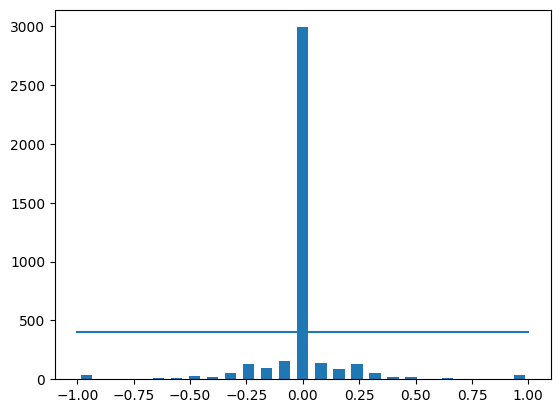

In [14]:
# visualize the data 
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [39]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2590
remaining: 1463


In [16]:
data.shape


4053

In [40]:
def load_img_steering(datadir, df):
    imagge_path =[]
    steering =[]
   
    for i in range(len(data)):
       
        indexed_data = data.iloc[i]
        center_img, left_img , right_img =indexed_data[0], indexed_data[1], indexed_data[2]

        # center image  append 
        imagge_path.append(os.path.join(datadir, center_img.strip()))
        steering.append(float(indexed_data[3]))

        # left image  append 
        imagge_path.append(os.path.join(datadir, left_img.strip()))
        steering.append(float(indexed_data[3]+0.15))

         # right image  append 
        imagge_path.append(os.path.join(datadir, right_img.strip()))
        steering.append(float(indexed_data[3]-0.15))

    imagge_path = np.asanyarray(imagge_path)
    steering = np.asanyarray(steering)

    return imagge_path , steering

In [41]:
image_pth, steering = load_img_steering(datadir+"/IMG", data)


len(image_pth)

4389

In [42]:
len(data)

1463

In [43]:
### Train test split
X_train , X_valid , y_train , y_valid =train_test_split(image_pth, steering, test_size=0.2, random_state=2025)

Text(0.5, 1.0, 'Validation set')

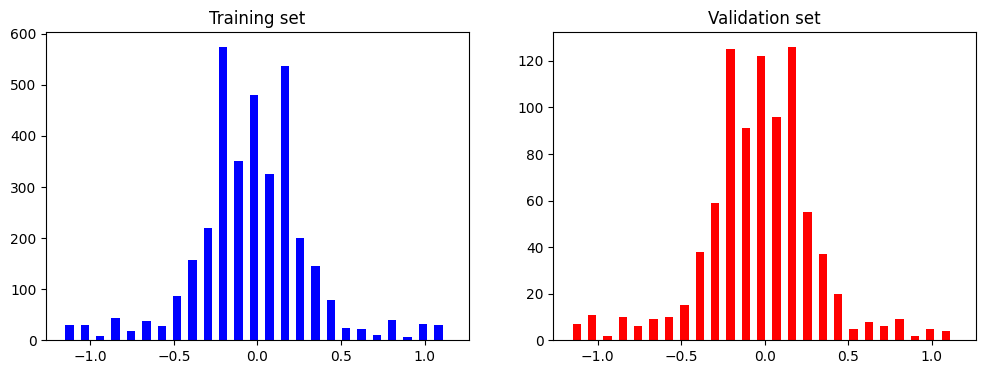

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

### Data Augmentation

Text(0.5, 1.0, 'Zoomed Image')

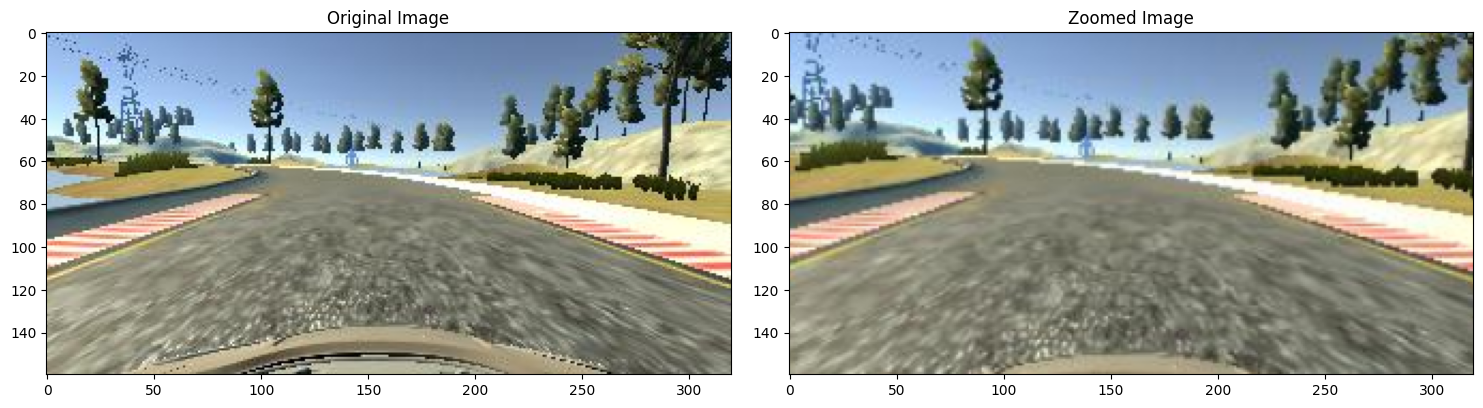

In [45]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image


image = image_pth[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

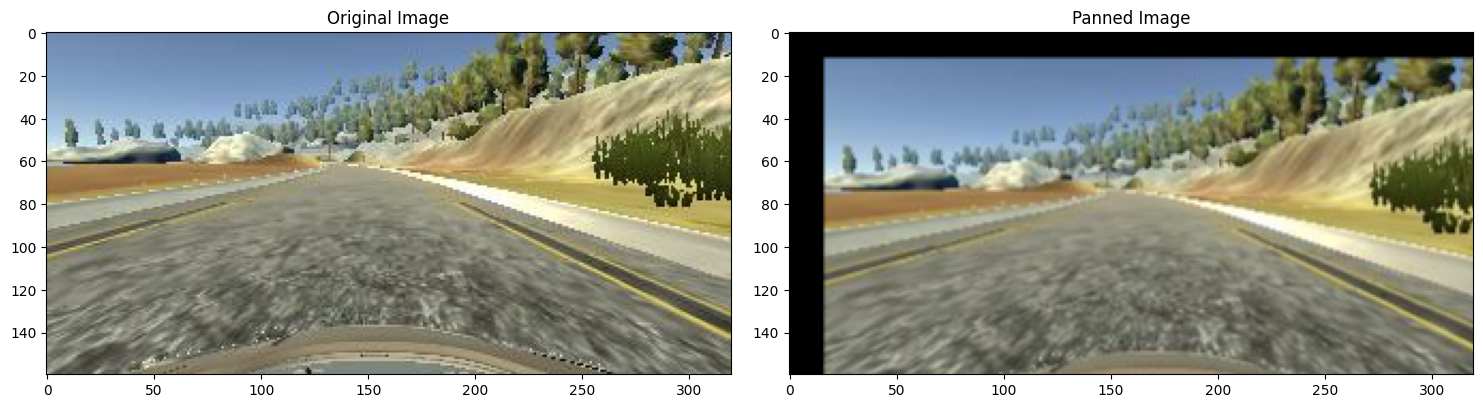

In [46]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image


image = image_pth[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered image ')

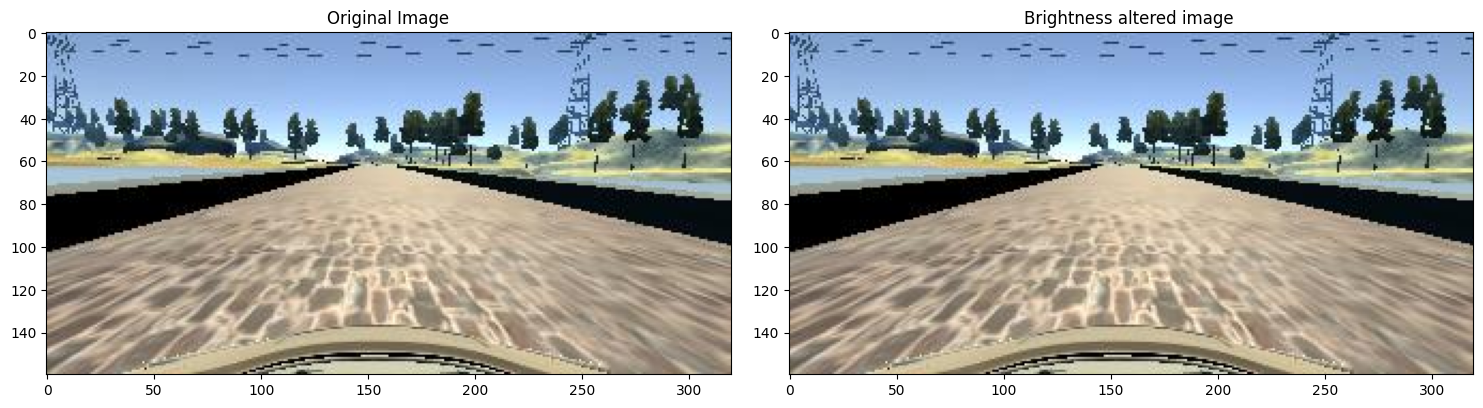

In [47]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image


image = image_pth[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)


fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.05533018')

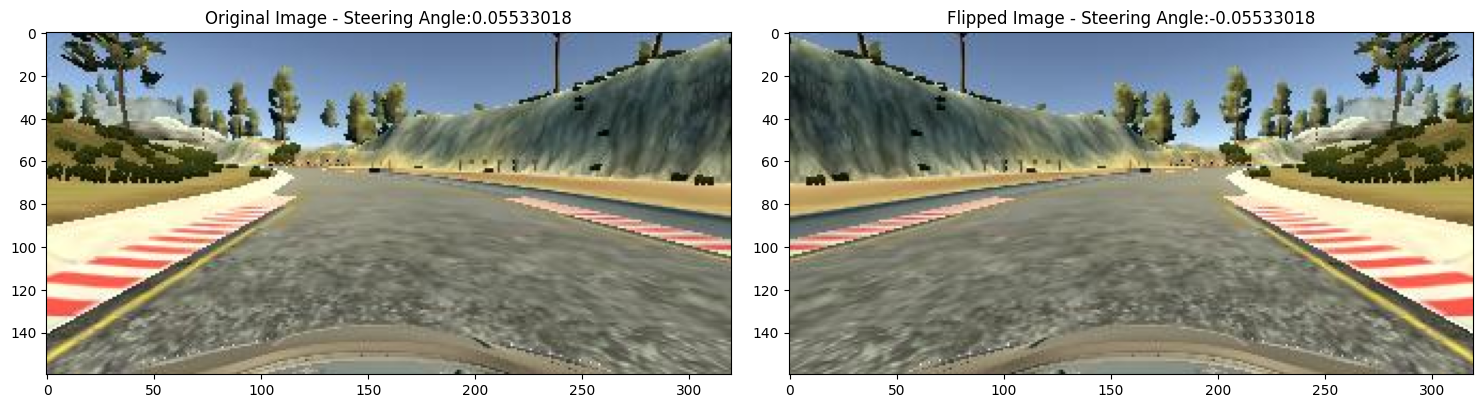

In [48]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle



random_index = random.randint(0, 1000)
image = image_pth[random_index]
steering_angle = steering[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [ ]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand()<0.5:
        image = pan(image)
    if np.random.rand()<0.5:
        image = zoom(image)
    if np.random.rand()<0.5:
        image = img_random_brightness(image)
    if np.random.rand()<0.5:
        image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle